### Data: US insurance premiums.

### Hypothesis:
1. What is the influence of age, BMI, number of children and smoking on the increase or decrease of insurance premiums in US?

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as ps
import pymssql as mss
import pandas as pd
import warnings as w
w.filterwarnings('ignore')

In [155]:
# Connecting to postgreSQL
conn = ps.connect(
    host = 'localhost',
    port = 5433,
    user = 'postgres',
    password = 'root',
    database= "jonaskarosas",
)

c = conn.cursor()

In [156]:
ins = pd.read_sql_query('select * from insuranceusa7cols', con=conn)
ins.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [157]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


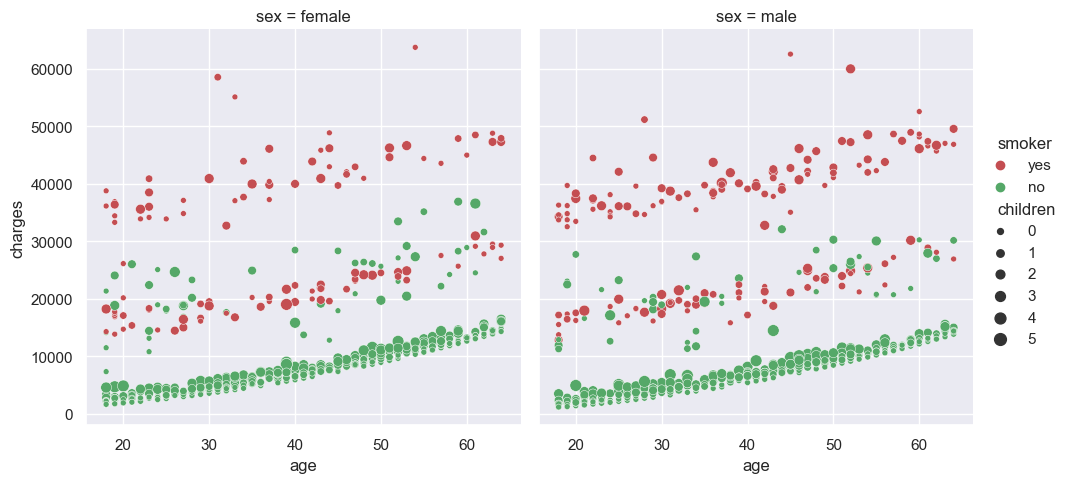

In [158]:
sns.set_theme()
sns.relplot(data=ins, x='age', y='charges', hue='smoker', col='sex', size='children', palette=['r', 'g'])

In [159]:
ins_chil = ins[ins['smoker'] == 'no'].groupby('children')
chil_keys = ins_chil.groups.keys()
print(chil_keys)

dict_keys([0, 1, 2, 3, 4, 5])


In [160]:
means_no = []
for i in chil_keys:
    means_no.append(ins_chil.get_group(i)['charges'].values.mean())
print(means_no)

[7611.793334790849, 8303.109350038023, 9493.093673675674, 9614.519390932204, 12121.344408181818, 8183.845555882352]


In [161]:
ins_chil = ins[ins['smoker'] == 'yes'].groupby('children')
means_yes = []
for i in chil_keys:
    means_yes.append(ins_chil.get_group(i)['charges'].values.mean())
print(means_yes)

[31341.363953652173, 31822.654334262294, 33844.2357549091, 32724.915268205124, 26532.27693333333, 19023.26]


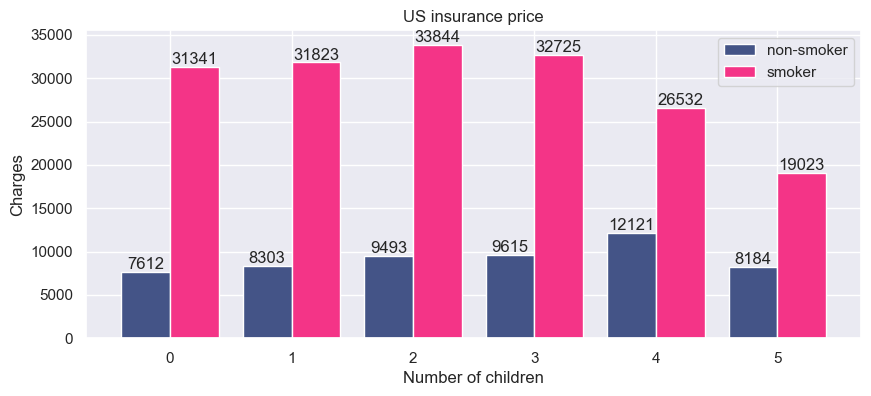

In [162]:
x = np.arange(0,len(chil_keys))

fig, ax = plt.subplots(figsize=(10,4))

w=0.4
A = ax.bar(x-w/2, means_no, width=w, color='#445487', label='non-smoker')
ax.bar_label(A, fmt='%.0f')

B = ax.bar(x+w/2, means_yes, width=w, color='#f43487', label='smoker')
ax.bar_label(B, fmt='%.0f')

plt.legend()
plt.xlabel('Number of children')
plt.ylabel('Charges')
plt.title('US insurance price')
plt.show()

In [163]:
# Connecting to Microsoft SLQ server database
conn = mss.connect(
    server = 'localhost',
    user = 'sa',
    password = 'Password91751691',
    database = 'jonaskarosas'
)
c = conn.cursor()

In [164]:
ins = pd.read_sql_query('select * from insuranceusa7cols', con=conn)
ins.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523


In [165]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1338 non-null   int64 
 1   sex       1338 non-null   object
 2   bmi       1338 non-null   object
 3   children  1338 non-null   int64 
 4   smoker    1338 non-null   object
 5   region    1338 non-null   object
 6   charges   1338 non-null   object
dtypes: int64(2), object(5)
memory usage: 73.3+ KB


In [166]:
ins = pd.read_csv('InsuranceUSA7cols.csv', encoding='utf-8')
ins.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


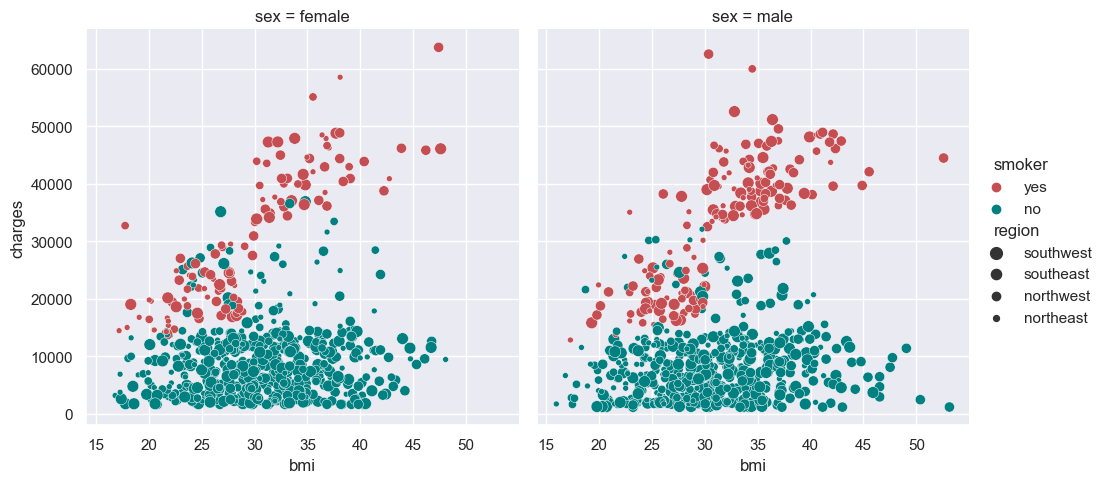

In [167]:
sns.relplot(data=ins, x='bmi', y='charges', hue='smoker', col='sex', size='region', palette=['r', 'teal'])

[Text(0.5, 1.0, 'US insurance charges depending on region and smoker status')]

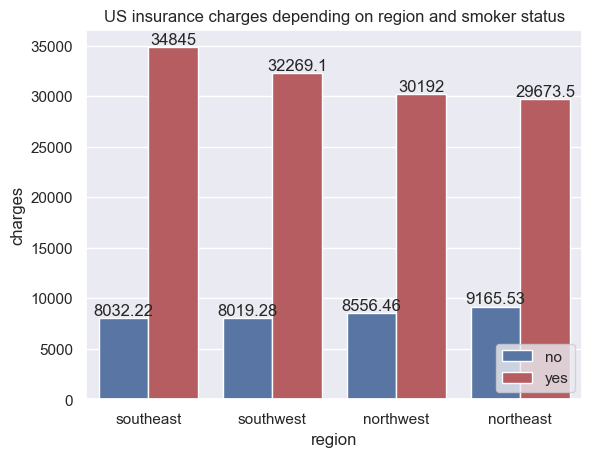

In [168]:
ax = sns.barplot(x='region', y='charges', data=ins.sort_values(by=['charges']), hue='smoker', palette=['b', 'r'], ci=None)
for container in ax.containers:
    ax.bar_label(container)

ax.legend(loc='lower right')
ax.set(title='US insurance charges depending on region and smoker status')

In [169]:
ins[ins['charges'] == ins['charges'].max()]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


### Insights:
- US insurance charges increase with age - older people pay more.
- More smokers are men.
- Women and men pay similar charges for the insurance.
- Charges are around 4 times higher for smokers.
- For non-smokers charges are the highest with 2 children, for smokers - with 4 children.
- BMI plays the role for smokers’ charges - if the BMI is over 30, then charges increasing around 2 times.
- The highest charges for non-smokers are in the northwest region, for smokers - southeast region.
- The highest charges pays the 54 years old smoking woman with no children and BMI equal to 47.41.